<a id="Import"></a>
# <p style="background-color: blue; font-family:calibri; color:whiteF; font-size:140%; font-family:Monospace; text-align:center; border-radius:10px 30px;"></p>
<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: brown; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">Flood Prediction by LGBM</h1>
</div>

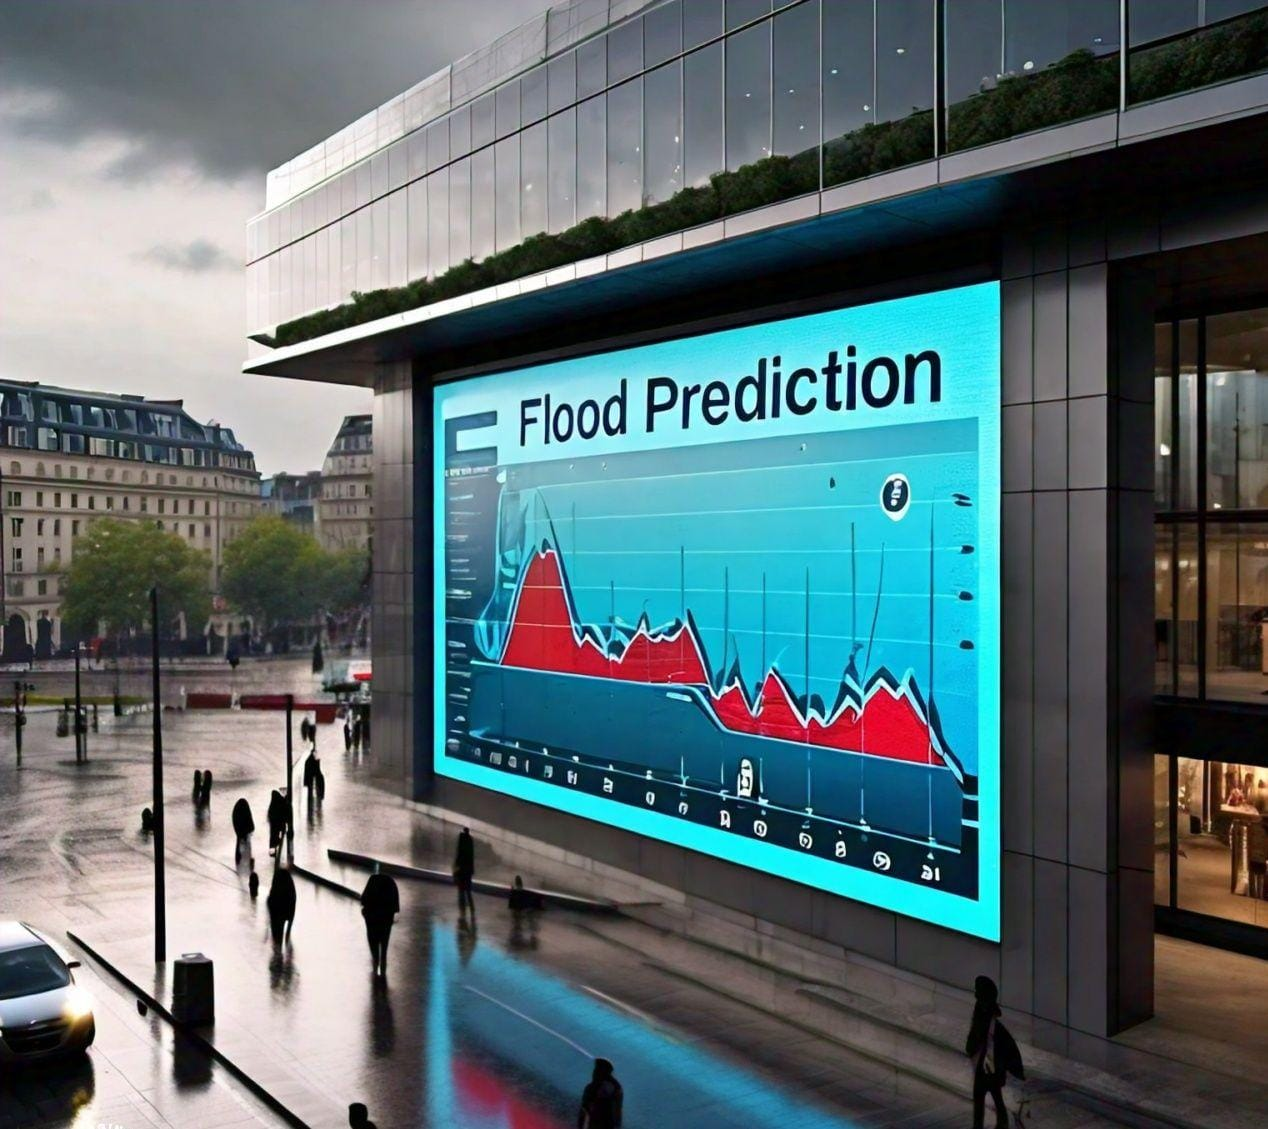

<div style="border: 2px solid #5388d0; padding: 10px; max-width: 1500px;">
    <p>
        I am <b>Muhammad Hamza</b>, a devoted data scientist passionate about delving into the complexities of machine learning and deep learning. My journey is driven by a relentless curiosity and a commitment to continuous improvement. I firmly believe in the values of #KeepLearning and #KeepSupporting, dedicating myself not only to advancing my own skills but also to fostering a supportive community for others embarking on their data science journey.
   </p>
    <div style="text-align: center;">
        <img src="https://storage.googleapis.com/kaggle-avatars/images/18640228-kg.jpeg?t=2024-01-28-11-05-47&quot" alt="Muhammad Hamza" style="width: 100px; height: 100px; border-radius: 50%; border: 2px solid #5388d0;"><br>
    </div>
    <p>
        You can find more about me on my <a href="https://www.linkedin.com/in/hamzaz/" target="_blank">LinkedIn</a>.<br>
          </p>
</div>

<a id="Import"></a>
# <p style="background-color: blue; font-family:calibri; color:whiteF; font-size:140%; font-family:Monospace; text-align:center; border-radius:10px 30px;"></p>
<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: brown; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">Importing Functions & Libraries</h1>
</div>

In [2]:
!pip install optuna colorama catboost 

In [9]:
# Import these libararies
import lightgbm as lgb
import pandas as pd
import optuna
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
import shap

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


from colorama import Fore, Style, init;
from IPython.display import display, HTML
from scipy.stats import skew 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier,CatBoostRegressor
from sklearn.metrics import *
palette = ["#2D2926FF", "#E94B3CFF"]
color_palette = sns.color_palette(palette)
# import warning module for Remove Warnings
import warnings
warnings.filterwarnings("ignore")
# To display all columns use set option of pandas
pd.set_option('display.max_columns', None)

<a id="Import"></a>
# <p style="background-color: blue; font-family:calibri; color:whiteF; font-size:140%; font-family:Monospace; text-align:center; border-radius:10px 30px;"></p>
<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: brown; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">Load And Overview Data</h1>
</div>


In [10]:
# Load Submission Data
sumb = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')
# Load test Data
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
#Train Data
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')

# Dropping Id from  Train
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

from colorama import Fore, Style, init
import pandas as pd
from IPython.display import display, HTML

# Initialize colorama
init(autoreset=True)

# Text Color Function
def PrintColor(text: str, color=Fore.CYAN, style=Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string"
    print(style + color + text + Style.RESET_ALL)

# Text For Main Heading
def print_stylish_heading(text, color=Fore.MAGENTA):
    PrintColor(f"\n{text}", color, Style.BRIGHT + Style.DIM)

# Main Heading
def print_boxed_heading(text, color=Fore.MAGENTA):
    length = len(text) + 4
    print(f"\n{Style.BRIGHT}{color}{'='*length}{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{color}| {text} |{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{color}{'='*length}{Style.RESET_ALL}")

# Function to Overview Data
def data_overview(train, test):

    # Display head of the training dataset nicely
    print_boxed_heading("The Head Of Train Dataset is:", Fore.CYAN)
    display(HTML(train.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid magenta; font-size: 14px; font-family: Arial, sans-serif;">')))

    print('\n')

    # Display head of the test dataset nicely
    print_boxed_heading("The Head Of Test Dataset is:", Fore.CYAN)
    display(HTML(test.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid magenta; font-size: 14px; font-family: Arial, sans-serif;">')))

    print('\n')

    # Shapes of Train and Test
    print_boxed_heading("Shape Information:", Fore.CYAN)
    PrintColor(f"The Shape Of Train Data is {train.shape} || No of Rows is : {train.shape[0]} and Columns is {train.shape[1]}", Fore.GREEN)
    print('\n')
    PrintColor(f"The Shape Of Test Data is {test.shape}  || No of Rows is : {test.shape[0]} and Columns is {test.shape[1]}", Fore.GREEN)
    print('\n')

    # Info of Both Datasets
    print_boxed_heading("Dataset Information:", Fore.CYAN)
    PrintColor(f"\nThe Info Of Train Dataset", Fore.YELLOW)
    train.info()
    PrintColor(f"\nThe Info Of Test Dataset is", Fore.YELLOW)
    test.info()
    print('\n')

    # Describe Both
    print_boxed_heading("Numerical Summary:", Fore.CYAN)
    PrintColor(f"\nThe Numerical Summary of Train is", Fore.BLUE)
    display(train.describe().style.set_caption("Train Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'blue')]}]))
    PrintColor(f"\nThe Numerical Summary of Test is", Fore.BLUE)
    display(test.describe().style.set_caption("Test Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'blue')]}]))
    print('\n')

    # Null Values in Train and Test
    print_boxed_heading("Null Values:", Fore.CYAN)
    PrintColor("\nNull Values in Train", Fore.RED)
    print(train.isnull().sum())
    PrintColor("\nNull Values in Test", Fore.RED)
    print(test.isnull().sum())
    print('\n')

    # Duplicates Values in Train and Test
    print_boxed_heading("Duplicate Values:", Fore.CYAN)
    PrintColor("\nDuplicates Values in Train", Fore.CYAN)
    print(train.duplicated().sum())
    PrintColor("\nDuplicates Values in Test", Fore.CYAN)
    print(test.duplicated().sum())


# **Check Data Missing values, duplicate,head ect.**

In [8]:
# Data Overview
data_overview(train,test)


| The Head Of Train Dataset is: |


MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415





| The Head Of Test Dataset is: |


MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5





| Shape Information: |
The Shape Of Train Data is (1117957, 21) || No of Rows is : 1117957 and Columns is 21


The Shape Of Test Data is (745305, 20)  || No of Rows is : 745305 and Columns is 20



| Dataset Information: |

The Info Of Train Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  in

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000,1117957.000000
mean,4.921450,4.926671,4.955322,4.942240,4.942517,4.934093,4.955878,4.927791,4.942619,4.949230,4.945239,4.946893,4.953999,4.931376,4.929032,4.925907,4.927520,4.950859,4.940587,4.939004,0.504480
std,2.056387,2.093879,2.072186,2.051689,2.083391,2.057742,2.083063,2.065992,2.068545,2.083324,2.078141,2.072333,2.088899,2.078287,2.082395,2.064813,2.074176,2.068696,2.081123,2.090350,0.051026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.470000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.505000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.540000
max,16.000000,18.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,18.000000,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,18.000000,19.000000,16.000000,16.000000,0.725000



The Numerical Summary of Test is


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000
mean,4.915610,4.930288,4.960027,4.946084,4.938424,4.933524,4.958468,4.927651,4.945308,4.950620,4.947436,4.944003,4.957209,4.927620,4.930720,4.926062,4.926957,4.948424,4.940204,4.943918
std,2.056295,2.094117,2.071722,2.052602,2.081816,2.059243,2.089312,2.068110,2.073404,2.081750,2.081322,2.072335,2.088787,2.079006,2.083348,2.065638,2.073692,2.065891,2.079128,2.087387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,16.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,17.000000,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,19.000000,22.000000,16.000000,16.000000





| Null Values: |

Null Values in Train
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

Null Values in Test
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0

# **Feature Engineering**

In [11]:
for col in train.columns:
    if col != 'FloodProbability':
        train[col] = train[col].astype('uint8')
        test[col] = test[col].astype('uint8')

In [12]:
# Cols
cols = [
       'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors',
       ]
# Function
def N_F(df):

    df['fsum'] = df[cols].sum(1)
    df['prod'] = df[cols].prod(1)
    df['fmin'] = df[cols].max(1)
    df['fmax'] = df[cols].min(1)
    df['fvar'] = df[cols].var(1)
    df['fskew'] = df[cols].skew(1)

    return df
# Call
train = N_F(train)
test = N_F(test)


<a id="Import"></a>
# <p style="background-color: blue; font-family:calibri; color:whiteF; font-size:140%; font-family:Monospace; text-align:center; border-radius:10px 30px;"></p>
<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: brown; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">Exploratory Data Analysis</h1>
</div>

In [5]:
# Function to Generate Histogram
def create_histograms(columns, data, color='#E94B3CFF', title_fontsize=14, label_fontsize=12, title_style='italic', label_style='normal'):
    num_cols = len(columns)
    num_rows = math.ceil(num_cols / 3)

    fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*4))

    for i, col in enumerate(columns):
        row = i // 3
        col_num = i % 3
        ax = axs[row, col_num] if num_rows > 1 else axs[col_num]

        ax.hist(data[col], bins=10, color=color, edgecolor='black')
        ax.set_title(col, fontsize=title_fontsize, fontstyle=title_style, color='#4B0082')  # Custom title styling
        ax.set_xlabel('Value', fontsize=label_fontsize, fontstyle=label_style, color='#483D8B')  # Custom xlabel styling
        ax.set_ylabel('Frequency', fontsize=label_fontsize, fontstyle=label_style, color='#483D8B')  # Custom ylabel styling

    # Hide unused subplots
    for i in range(num_cols, num_rows*3):
        row = i // 3
        col_num = i % 3
        axs[row, col_num].axis('off')

    plt.tight_layout()
    plt.show()

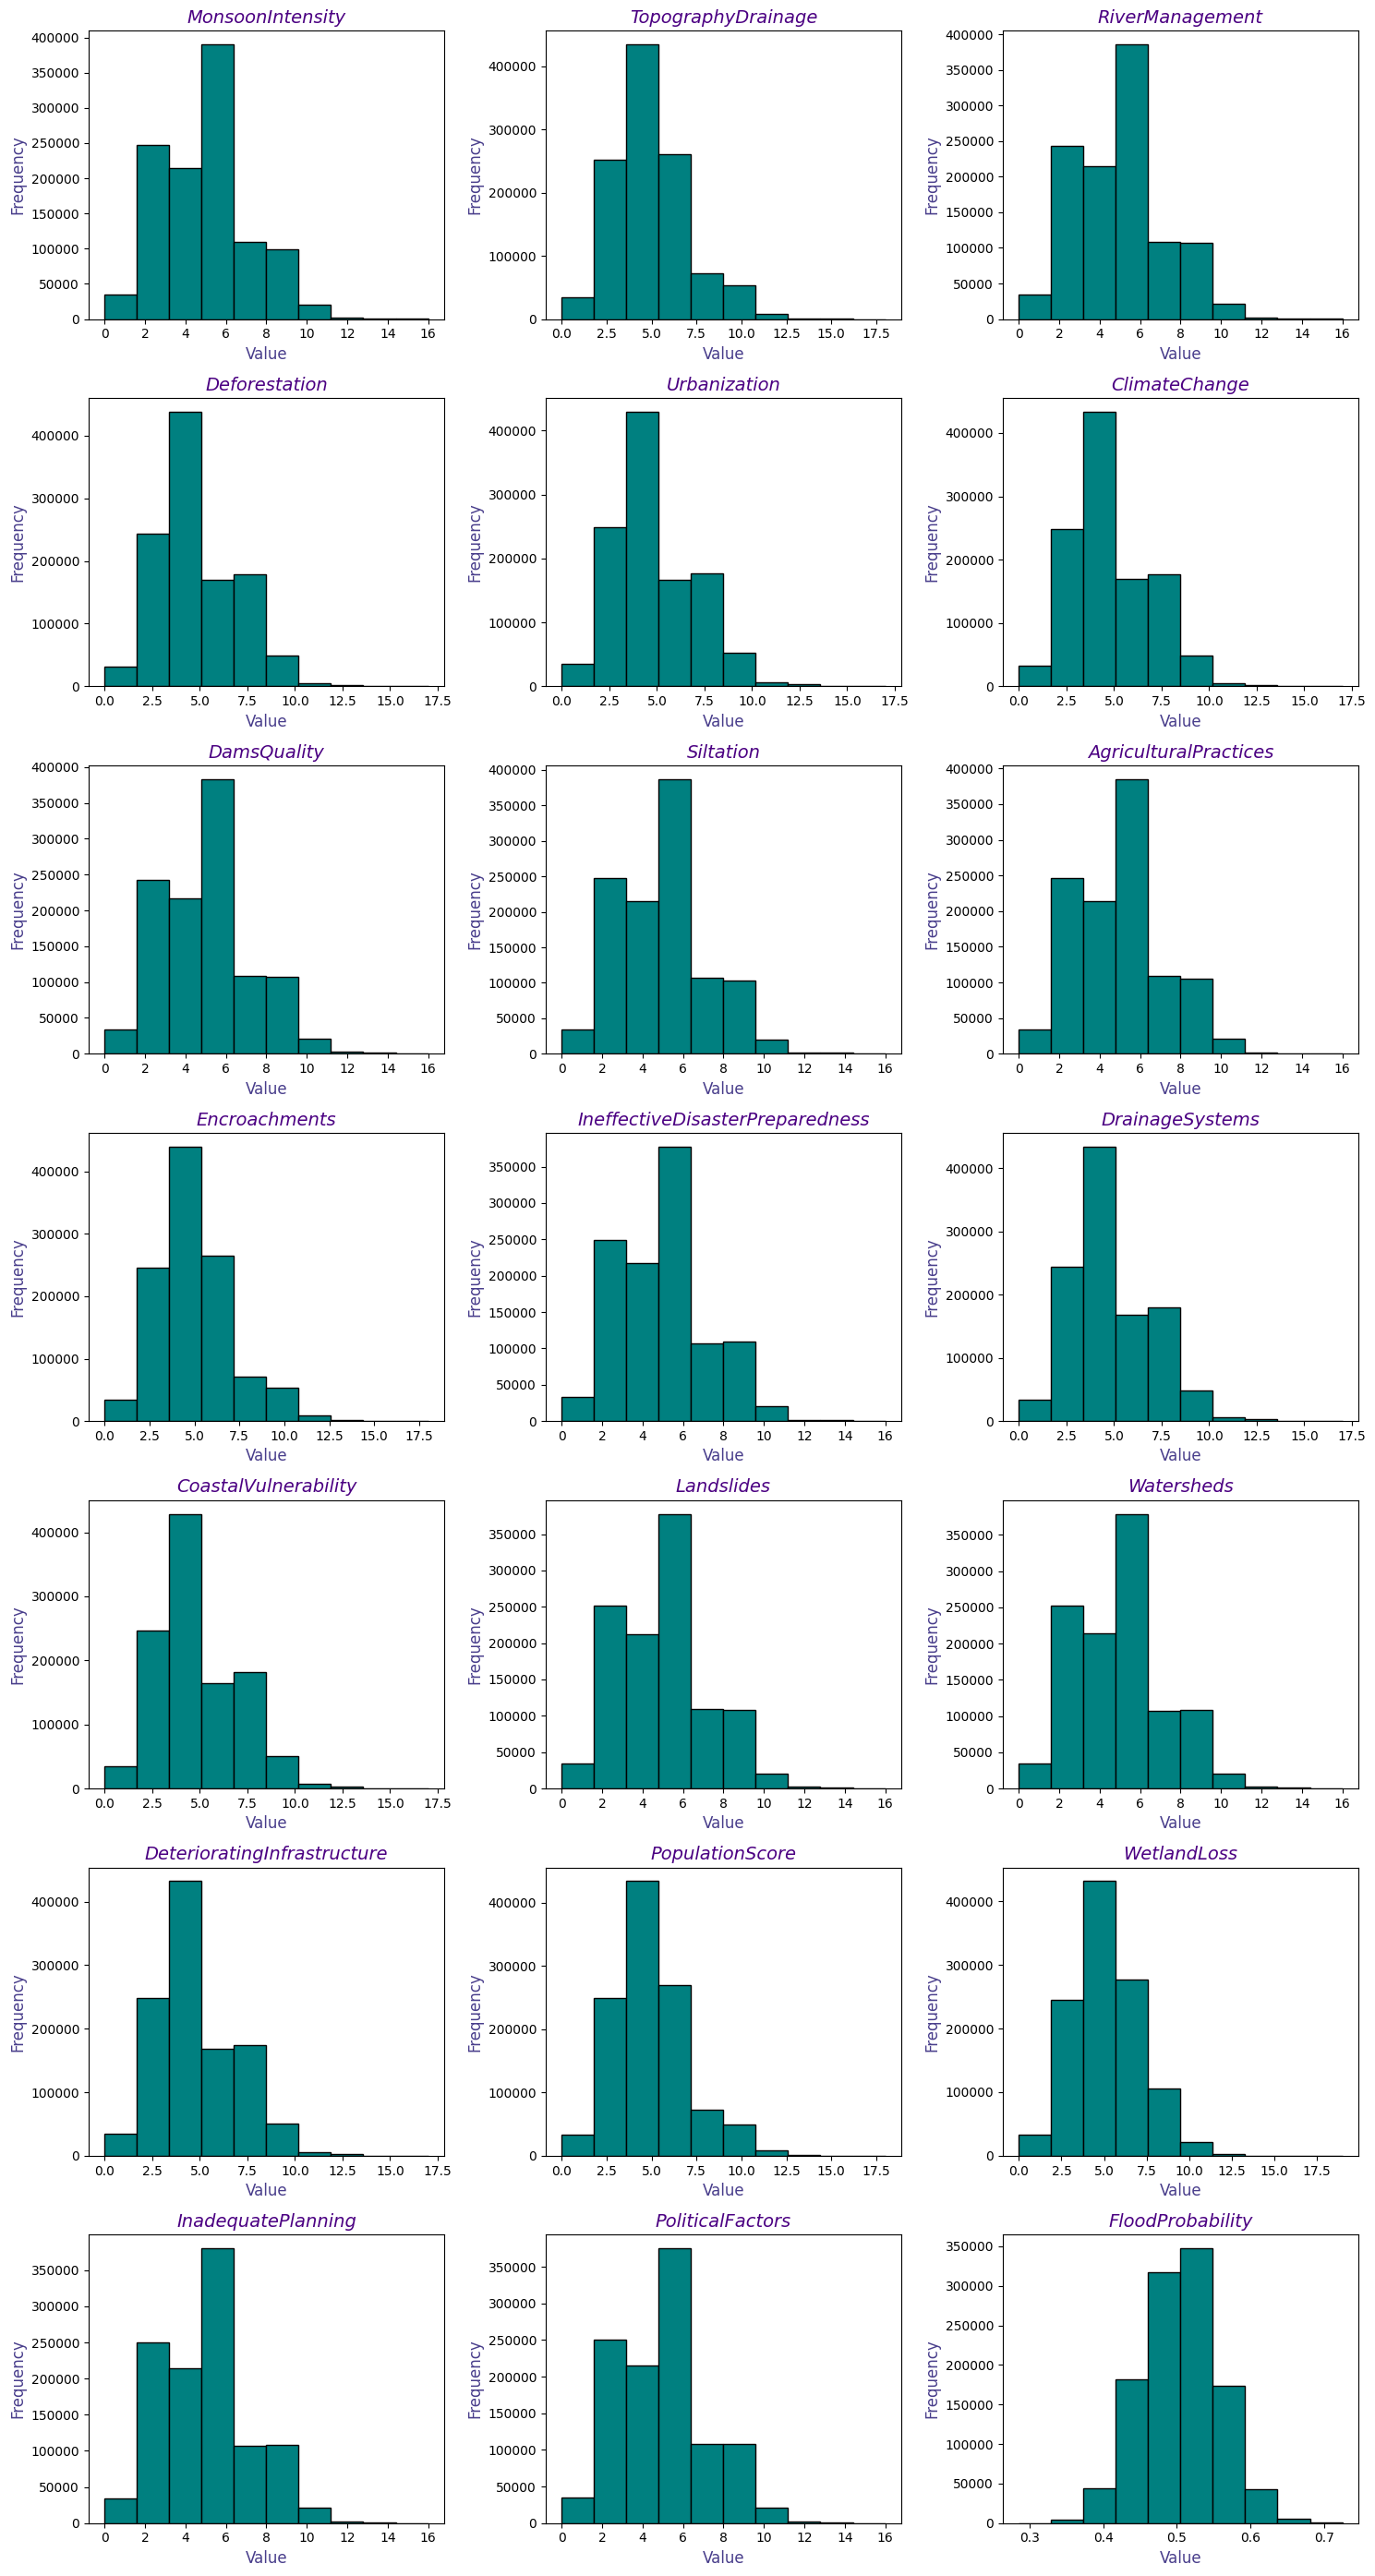

In [20]:
# HistoGram
create_histograms(train.columns, train , color = 'Teal')

# **Scatter Graph**

In [29]:
# Function for Scatter graph
def scatter_plott(x_column, y_column, dataframe, color='blue'):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=x_column, y=y_column, data=dataframe, color=color)
    plt.title(f'Scatter Plot of {x_column} vs {y_column}', fontsize=18)
    plt.xlabel(x_column, fontsize=16)
    plt.ylabel(y_column, fontsize=16)
    plt.grid(True)
    plt.show()

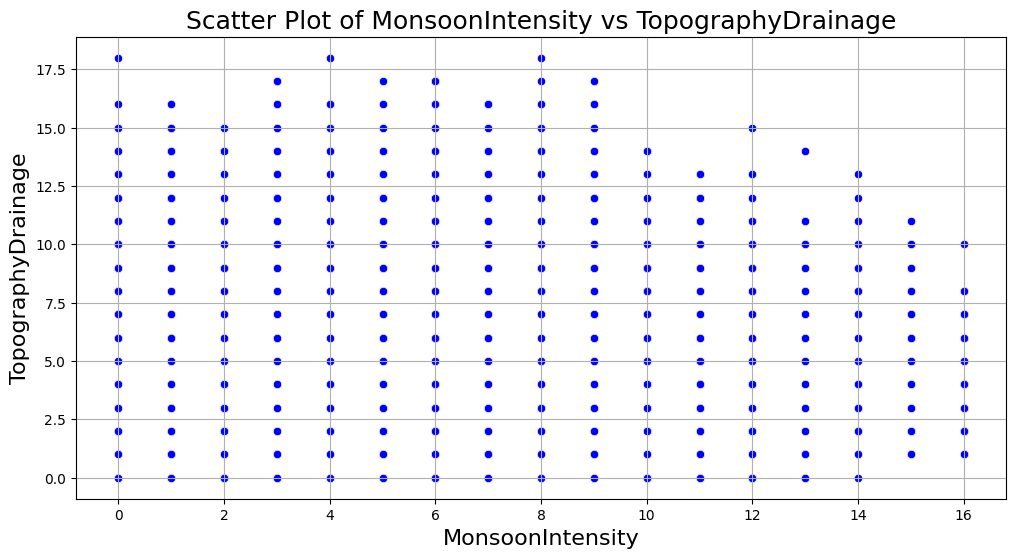

In [30]:
# Scatter Plot | to Show MonsoonIntensity vs TopographyDrainage RealtionShip
scatter_plott('MonsoonIntensity', 'TopographyDrainage', train)

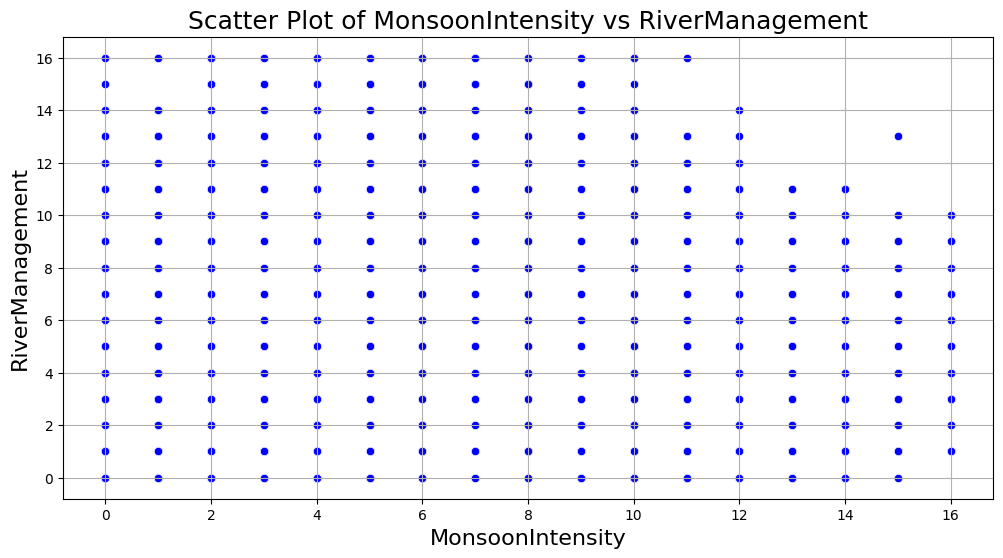

In [31]:
# Scatter Plot | to Show MonsoonIntensity vs RiverManagement RealtionShip
scatter_plott('MonsoonIntensity', 'RiverManagement', train)

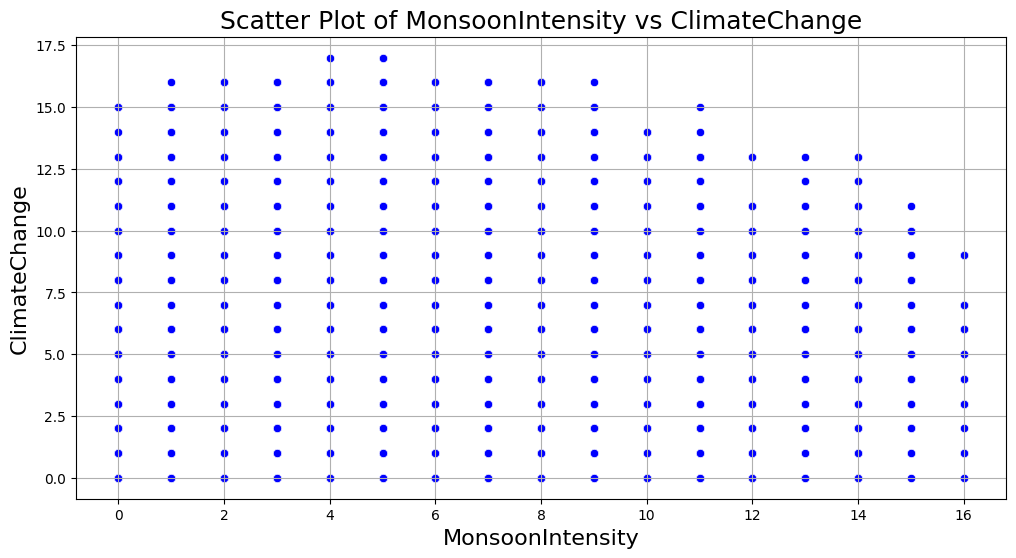

In [32]:
# Scatter Plot | to Show MonsoonIntensity vs ClimateChange RealtionShip
scatter_plott('MonsoonIntensity', 'ClimateChange', train)

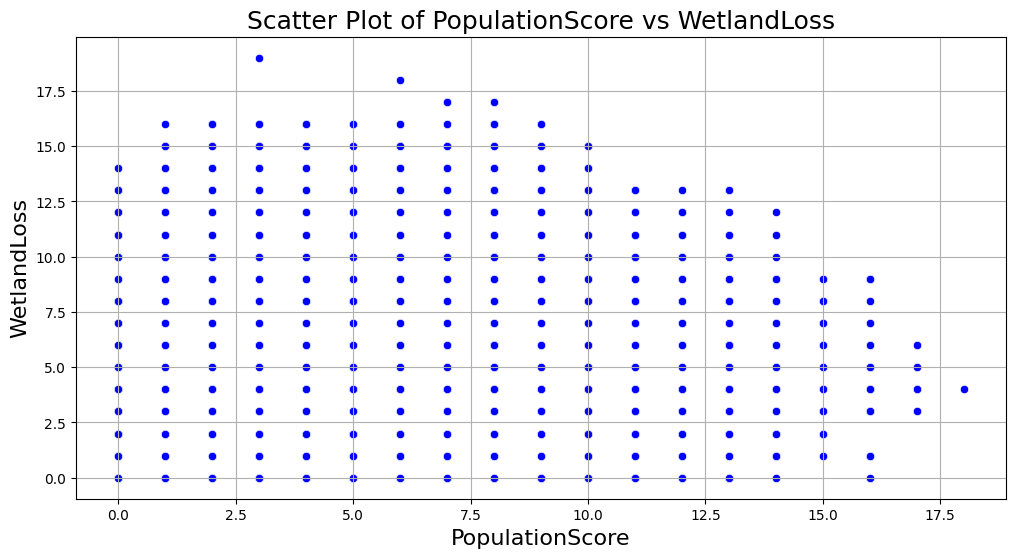

In [33]:
# # Scatter Plot | to Show PopulationScore vs WetlandLoss RealtionShip
scatter_plott('PopulationScore', 'WetlandLoss', train)

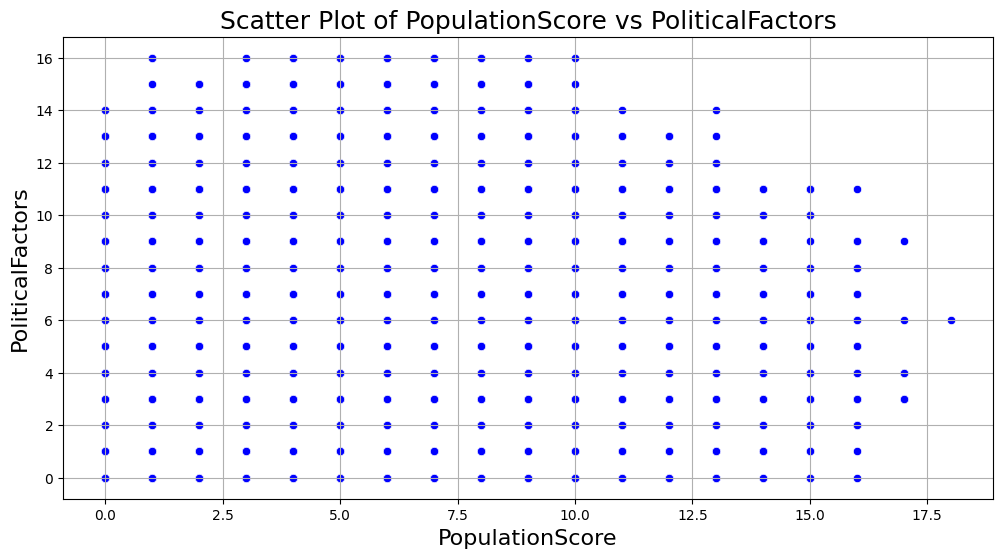

In [35]:
# # Scatter Plot | to Show PopulationScore vs PoliticalFactors RealtionShip
scatter_plott('PopulationScore', 'PoliticalFactors', train)

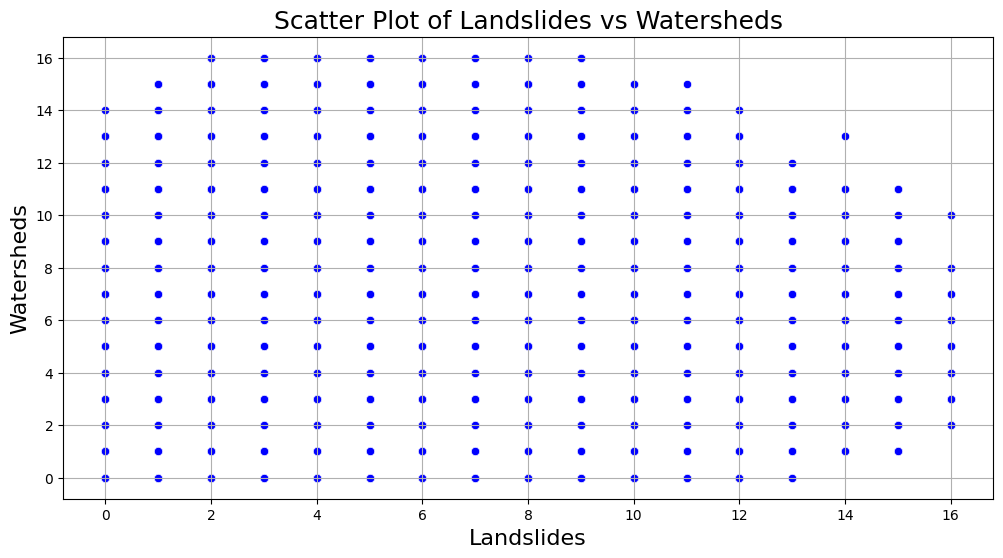

In [34]:
# # Scatter Plot | to Show Landslides vs Watersheds RealtionShip
scatter_plott('Landslides', 'Watersheds', train)

<a id="Import"></a>
# <p style="background-color: blue; font-family:calibri; color:whiteF; font-size:140%; font-family:Monospace; text-align:center; border-radius:10px 30px;"></p>
<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: brown; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">Split Data and Check it's Shape</h1>
</div>

In [15]:
# Split the data into features (X) and target (y) for training
X_T = train.drop('FloodProbability', axis=1)
y_T = train['FloodProbability']


# Encode labels as integers
label_encoder = LabelEncoder()
y_T = label_encoder.fit_transform(y_T)



#split
X_TR, X_val, Y_TR, Y_val = train_test_split(X_T, y_T, test_size=0.1, random_state=42)

X_TR = np.array(X_TR)
X_val = np.array(X_val)
Y_TR = np.array(Y_TR)
Y_val = np.array(Y_val)

# Standardize the data
scaler = StandardScaler()
X_TR = scaler.fit_transform(X_TR)
X_val = scaler.transform(X_val)


PrintColor(f"Training set shape -x: {X_TR.shape}, y: {Y_TR.shape}")
PrintColor(f"Testing set shape -x: {X_val.shape}, y: {Y_val.shape}")

Training set shape -x: (1006161, 26), y: (1006161,)
Testing set shape -x: (111796, 26), y: (111796,)


<a id="Import"></a>
# <p style="background-color: blue; font-family:calibri; color:whiteF; font-size:140%; font-family:Monospace; text-align:center; border-radius:10px 30px;"></p>
<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: brown; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">Apply Multiple models and check performance</h1>
</div>

In [10]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor()
}

# Function to train and evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}
    return results


In [11]:
results = evaluate_models(models, X_TR, Y_TR, X_val, Y_val)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.293149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 1006161, number of used features: 26
[LightGBM] [Info] Start training from score 38.896930


In [12]:
# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  RMSE: {metrics['RMSE']}")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  R²: {metrics['R²']}")
    print()

Model: Linear Regression
  RMSE: 4.0065414023037995
  MAE: 3.153494000576529
  R²: 0.8456162232421576

Model: Random Forest
  RMSE: 3.7251939568191426
  MAE: 2.8974645783391177
  R²: 0.8665372188391982

Model: Gradient Boosting
  RMSE: 3.7158733293925668
  MAE: 2.913945134582179
  R²: 0.8672042448522348

Model: LightGBM
  RMSE: 3.691380556294392
  MAE: 2.876847374294348
  R²: 0.8689490927751986



<a id="Import"></a>
# <p style="background-color: blue; font-family:calibri; color:whiteF; font-size:140%; font-family:Monospace; text-align:center; border-radius:10px 30px;"></p>
<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: brown; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">Final Train Model</h1>
</div>

In [27]:
# Optuna for hyperparameter tuning of LightGBM
def objective(trial):
    param = {
        'objective': 'regression',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
    }
    model = lgb.LGBMRegressor(**param)
    model.fit(X_TR, Y_TR, eval_set=[(X_val, Y_val)], eval_metric='rmse',
              callbacks=[lgb.early_stopping(stopping_rounds=10)])
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(Y_val, y_pred, squared=False)
    return rmse


best_params = {'num_leaves': 134, 'learning_rate': 0.034860306417748545, 'n_estimators': 693, 'max_depth': 12, 'feature_fraction': 0.9531499959382244, 'bagging_fraction': 0.9397168816851982, 'bagging_freq': 4}
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_TR, Y_TR, eval_set=[(X_val, Y_val)], eval_metric='rmse')


[LightGBM] [Warning] feature_fraction is set=0.9531499959382244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9531499959382244
[LightGBM] [Warning] bagging_fraction is set=0.9397168816851982, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9397168816851982
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9531499959382244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9531499959382244
[LightGBM] [Warning] bagging_fraction is set=0.9397168816851982, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9397168816851982
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.262466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

LGBMRegressor(bagging_fraction=0.9397168816851982, bagging_freq=4,
              feature_fraction=0.9531499959382244,
              learning_rate=0.034860306417748545, max_depth=12,
              n_estimators=693, num_leaves=134)

<a id="Import"></a>
# <p style="background-color: blue; font-family:calibri; color:whiteF; font-size:140%; font-family:Monospace; text-align:center; border-radius:10px 30px;"></p>
<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: brown; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">Feature Importance and Predictions</h1>
</div>

[LightGBM] [Warning] feature_fraction is set=0.8184741229589368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8184741229589368
[LightGBM] [Warning] bagging_fraction is set=0.7694195683143583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7694195683143583
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


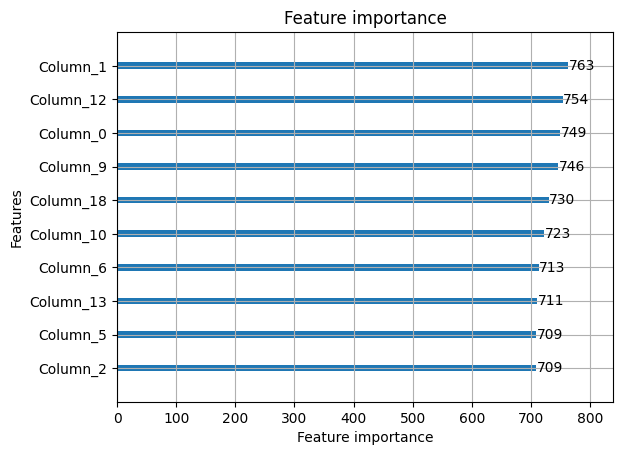

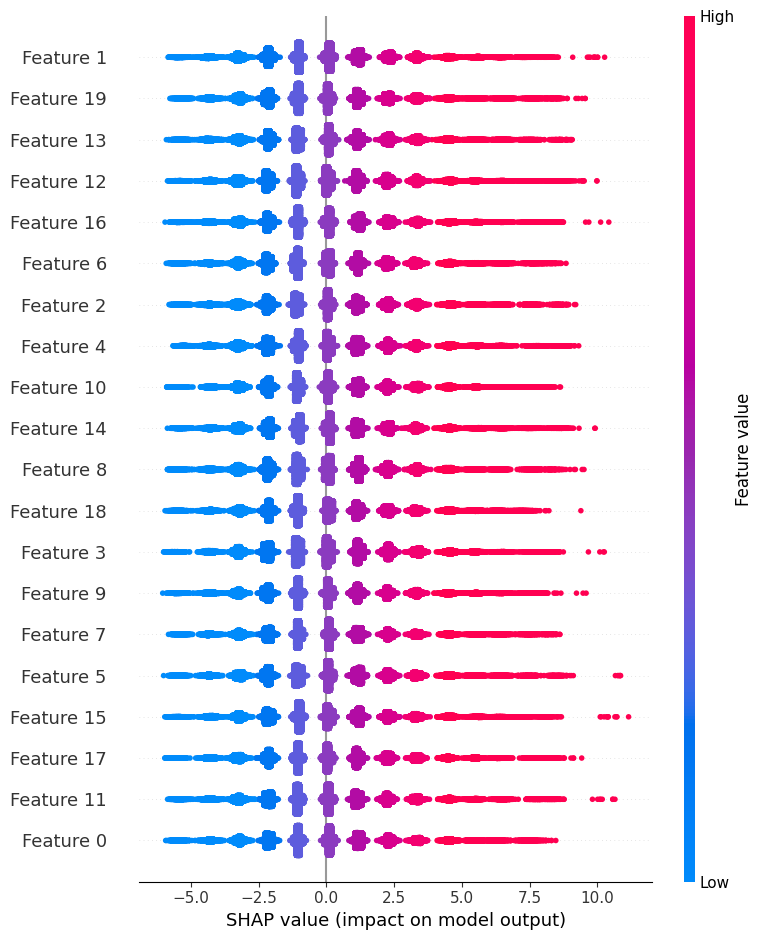

In [39]:
y_pred = final_model.predict(X_val)

# Evaluate the final model
final_rmse = mean_squared_error(Y_val, y_pred, squared=False)
final_mae = mean_absolute_error(Y_val, y_pred)
final_r2 = r2_score(Y_val, y_pred)

lgb.plot_importance(final_model, max_num_features=10)
plt.show()

# SHAP values for model interpretation
explainer = shap.Explainer(final_model)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val)

In [39]:
print("Final LightGBM Model Performance:")
print(f"  Squared Error(MSE): {final_mse}")
print(f"  RMSE: {final_rmse}")
print(f"  MAE: {final_mae}")
print(f"  R²: {final_r2}")

Final LightGBM Model Performance:
  Squared Error(MSE): 13.612589151512068
  RMSE: 3.689524244602828
  MAE: 2.8674393035110035
  R²: 0.8690808647015772


<a id="Import"></a>
# <p style="background-color: blue; font-family:calibri; color:whiteF; font-size:140%; font-family:Monospace; text-align:center; border-radius:10px 30px;"></p>
<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: brown; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">Finally predictions on test data and make submission file</h1>
</div>

In [42]:
X_test = scaler.transform(test)
y_pred_test = final_model.predict(X_test)
submission = pd.DataFrame({
    'id': sumb.id,
    'FloodProbability': y_pred_test
})
# Save submission file
submission.to_csv('Submission.csv', index=False)

[LightGBM] [Warning] feature_fraction is set=0.9531499959382244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9531499959382244
[LightGBM] [Warning] bagging_fraction is set=0.9397168816851982, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9397168816851982
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


<a id="Import"></a>
# <p style="background-color: blue; font-family:calibri; color:whiteF; font-size:140%; font-family:Monospace; text-align:center; border-radius:10px 30px;"></p>
<div style="border-radius: 30px 0 30px 0px; border: 2px solid #5388d0; padding: 20px; background-color: #c9e6f6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: brown; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: Bold; margin-bottom: 10px; font-size: 36px;">Save Predictions in file</h1>
</div>